In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

data_file = 'data/data.csv'
data = pd.read_csv(data_file)
# print(data.columns)

# get time of people who are not free

class Day:
    def __init__(self, name):
        self.name = name
        self.time_slots = []
        self.people = set()
        self.num_people = 0
        self.add_time_slots()

    def add_time_slot(self, time_slot):
        self.time_slots.append(time_slot)

    def add_time_slots(self):
        for i in range(10,22):
            self.add_time_slot(TimeSlot(str(i) + '00-' + str(i+1) + '00'))   

    def add_person(self, person):
        self.people.add(person)
        self.num_people += 1

    def __repr__(self):
        return self.name + str(self.time_slots) + str(self.people)

class TimeSlot:
    def __init__(self, name):
        self.name = name
        self.people = set()
        self.num_people = 0

    def add_person(self, person):
        self.people.add(person)
        self.num_people += 1

    def __repr__(self):
        return self.name + str(self.people)

class Person:
    def __init__(self, name):
        self.name = name
        self.days = []
        self.num_days = 0

    def add_day(self, day):
        self.days.append(day)
        self.num_days += 1

    def __repr__(self):
        return self.name + self.days

# create days
monday = Day('Monday')
tuesday = Day('Tuesday')
wednesday = Day('Wednesday')
thursday = Day('Thursday')
friday = Day('Friday')
saturday = Day('Saturday')
sunday = Day('Sunday')

#create people
people = []

# iterate through data and add people to days, invert so that it is available timeslots
for i in range(len(data)):
    name = data['Full Name'][i]
    person = Person(name)
    people.append(person)
    # per time slot
    for j in range(10,22):
        col = 'Please indicate the timings and days in which you are generally 𝗡𝗢𝗧 free for rehearsals.  [' + str(j) + '00-' + str(j+1) + '00' ']'
        days = str(data[col][i])

        # if pd.isnull(days):
        #     continue
        days = days.split(', ')
        if 'Monday' not in days:
            monday.add_person(name)
            monday.time_slots[j-10].add_person(name)
        if 'Tuesday' not in days:
            tuesday.add_person(name)
            tuesday.time_slots[j-10].add_person(name)
        if 'Wednesday' not in days:
            wednesday.add_person(name)
            wednesday.time_slots[j-10].add_person(name)
        if 'Thursday' not in days:
            thursday.add_person(name)
            thursday.time_slots[j-10].add_person(name)
        if 'Friday' not in days:
            friday.add_person(name)
            friday.time_slots[j-10].add_person(name)
        if 'Saturday' not in days:
            saturday.add_person(name)
            saturday.time_slots[j-10].add_person(name)
        if 'Sunday' not in days:
            sunday.add_person(name)
            sunday.time_slots[j-10].add_person(name)


# try to find 3 hour blocks where the person is free
monday_possible_timeslots = []

for x in range(len(monday.time_slots) - 2):

    # get intesect of this time slot and the next 2
    # get the people who are free
    new_TimeSlot = TimeSlot(monday.time_slots[x].name[:5] + monday.time_slots[x+2].name[5:])
    print(monday.time_slots[x].people)
    new_TimeSlot.people = monday.time_slots[x].people.intersection(monday.time_slots[x+1].people, monday.time_slots[x+2].people)
    monday_possible_timeslots.append(new_TimeSlot)


tuesday_possible_timeslots = []

for x in range(len(tuesday.time_slots) - 2):

    # get intesect of this time slot and the next 2
    # get the people who are free
    new_TimeSlot = TimeSlot(tuesday.time_slots[x].name[:5] + tuesday.time_slots[x+2].name[5:])
    new_TimeSlot.people = tuesday.time_slots[x].people.intersection(tuesday.time_slots[x+1].people, tuesday.time_slots[x+2].people)
    tuesday_possible_timeslots.append(new_TimeSlot)

wednesday_possible_timeslots = []

for x in range(len(wednesday.time_slots) - 2):

    # get intesect of this time slot and the next 2
    # get the people who are free
    new_TimeSlot = TimeSlot(wednesday.time_slots[x].name[:5] + wednesday.time_slots[x+2].name[5:])
    new_TimeSlot.people = wednesday.time_slots[x].people.intersection(wednesday.time_slots[x+1].people, wednesday.time_slots[x+2].people)
    wednesday_possible_timeslots.append(new_TimeSlot)

thursday_possible_timeslots = []

for x in range(len(thursday.time_slots) - 2):

    # get intesect of this time slot and the next 2
    # get the people who are free
    new_TimeSlot = TimeSlot(thursday.time_slots[x].name[:5] + thursday.time_slots[x+2].name[5:])
    new_TimeSlot.people = thursday.time_slots[x].people.intersection(thursday.time_slots[x+1].people, thursday.time_slots[x+2].people)
    thursday_possible_timeslots.append(new_TimeSlot)

friday_possible_timeslots = []

for x in range(len(friday.time_slots) - 2):

    # get intesect of this time slot and the next 2
    # get the people who are free
    new_TimeSlot = TimeSlot(friday.time_slots[x].name[:5] + friday.time_slots[x+2].name[5:])
    new_TimeSlot.people = friday.time_slots[x].people.intersection(friday.time_slots[x+1].people, friday.time_slots[x+2].people)
    friday_possible_timeslots.append(new_TimeSlot)

saturday_possible_timeslots = []

for x in range(len(saturday.time_slots) - 2):

    # get intesect of this time slot and the next 2
    # get the people who are free
    new_TimeSlot = TimeSlot(saturday.time_slots[x].name[:5] + saturday.time_slots[x+2].name[5:])
    new_TimeSlot.people = saturday.time_slots[x].people.intersection(saturday.time_slots[x+1].people, saturday.time_slots[x+2].people)
    saturday_possible_timeslots.append(new_TimeSlot)

sunday_possible_timeslots = []

for x in range(len(sunday.time_slots) - 2):

    # get intesect of this time slot and the next 2
    # get the people who are free
    new_TimeSlot = TimeSlot(sunday.time_slots[x].name[:5] + sunday.time_slots[x+2].name[5:])
    new_TimeSlot.people = sunday.time_slots[x].people.intersection(sunday.time_slots[x+1].people, sunday.time_slots[x+2].people)
    sunday_possible_timeslots.append(new_TimeSlot)






{'lindsey tay wan ying', 'Alyssa Chong', 'Toh Lyn Li, Christabel', 'Li Yutong', 'Jolene Koh Geak Ling', 'Xenos Fiorenzo Anong ', 'Go Maomi Rosseli Miguel', 'Chang Jin Lynn', 'Tan Ni Kher ', 'Loo Jia Xuan', 'Tricia Yee', 'yong qing ', 'Sherise Tan ', 'Yap Xin Yu (Phoebe)', 'Tricia Koh', 'Maximillian Lim Sheng Lee', 'Wu XueTing', 'Lee Kai Kiat, Ivan', 'Rachel Lee Shi Qi', 'Eunice Chan', 'Deborah Tan'}
{'lindsey tay wan ying', 'Alyssa Chong', 'Toh Lyn Li, Christabel', 'Li Yutong', 'Jolene Koh Geak Ling', 'Xenos Fiorenzo Anong ', 'Go Maomi Rosseli Miguel', 'Chang Jin Lynn', 'Tan Ni Kher ', 'Loo Jia Xuan', 'Tricia Yee', 'yong qing ', 'Sherise Tan ', 'Yap Xin Yu (Phoebe)', 'Tricia Koh', 'Maximillian Lim Sheng Lee', 'Wu XueTing', 'Lee Kai Kiat, Ivan', 'Rachel Lee Shi Qi', 'Eunice Chan', 'Deborah Tan'}
{'lindsey tay wan ying', 'Alyssa Chong', 'Toh Lyn Li, Christabel', 'Li Yutong', 'Jolene Koh Geak Ling', 'Xenos Fiorenzo Anong ', 'Go Maomi Rosseli Miguel', 'Chang Jin Lynn', 'Tan Ni Kher ', 'Loo

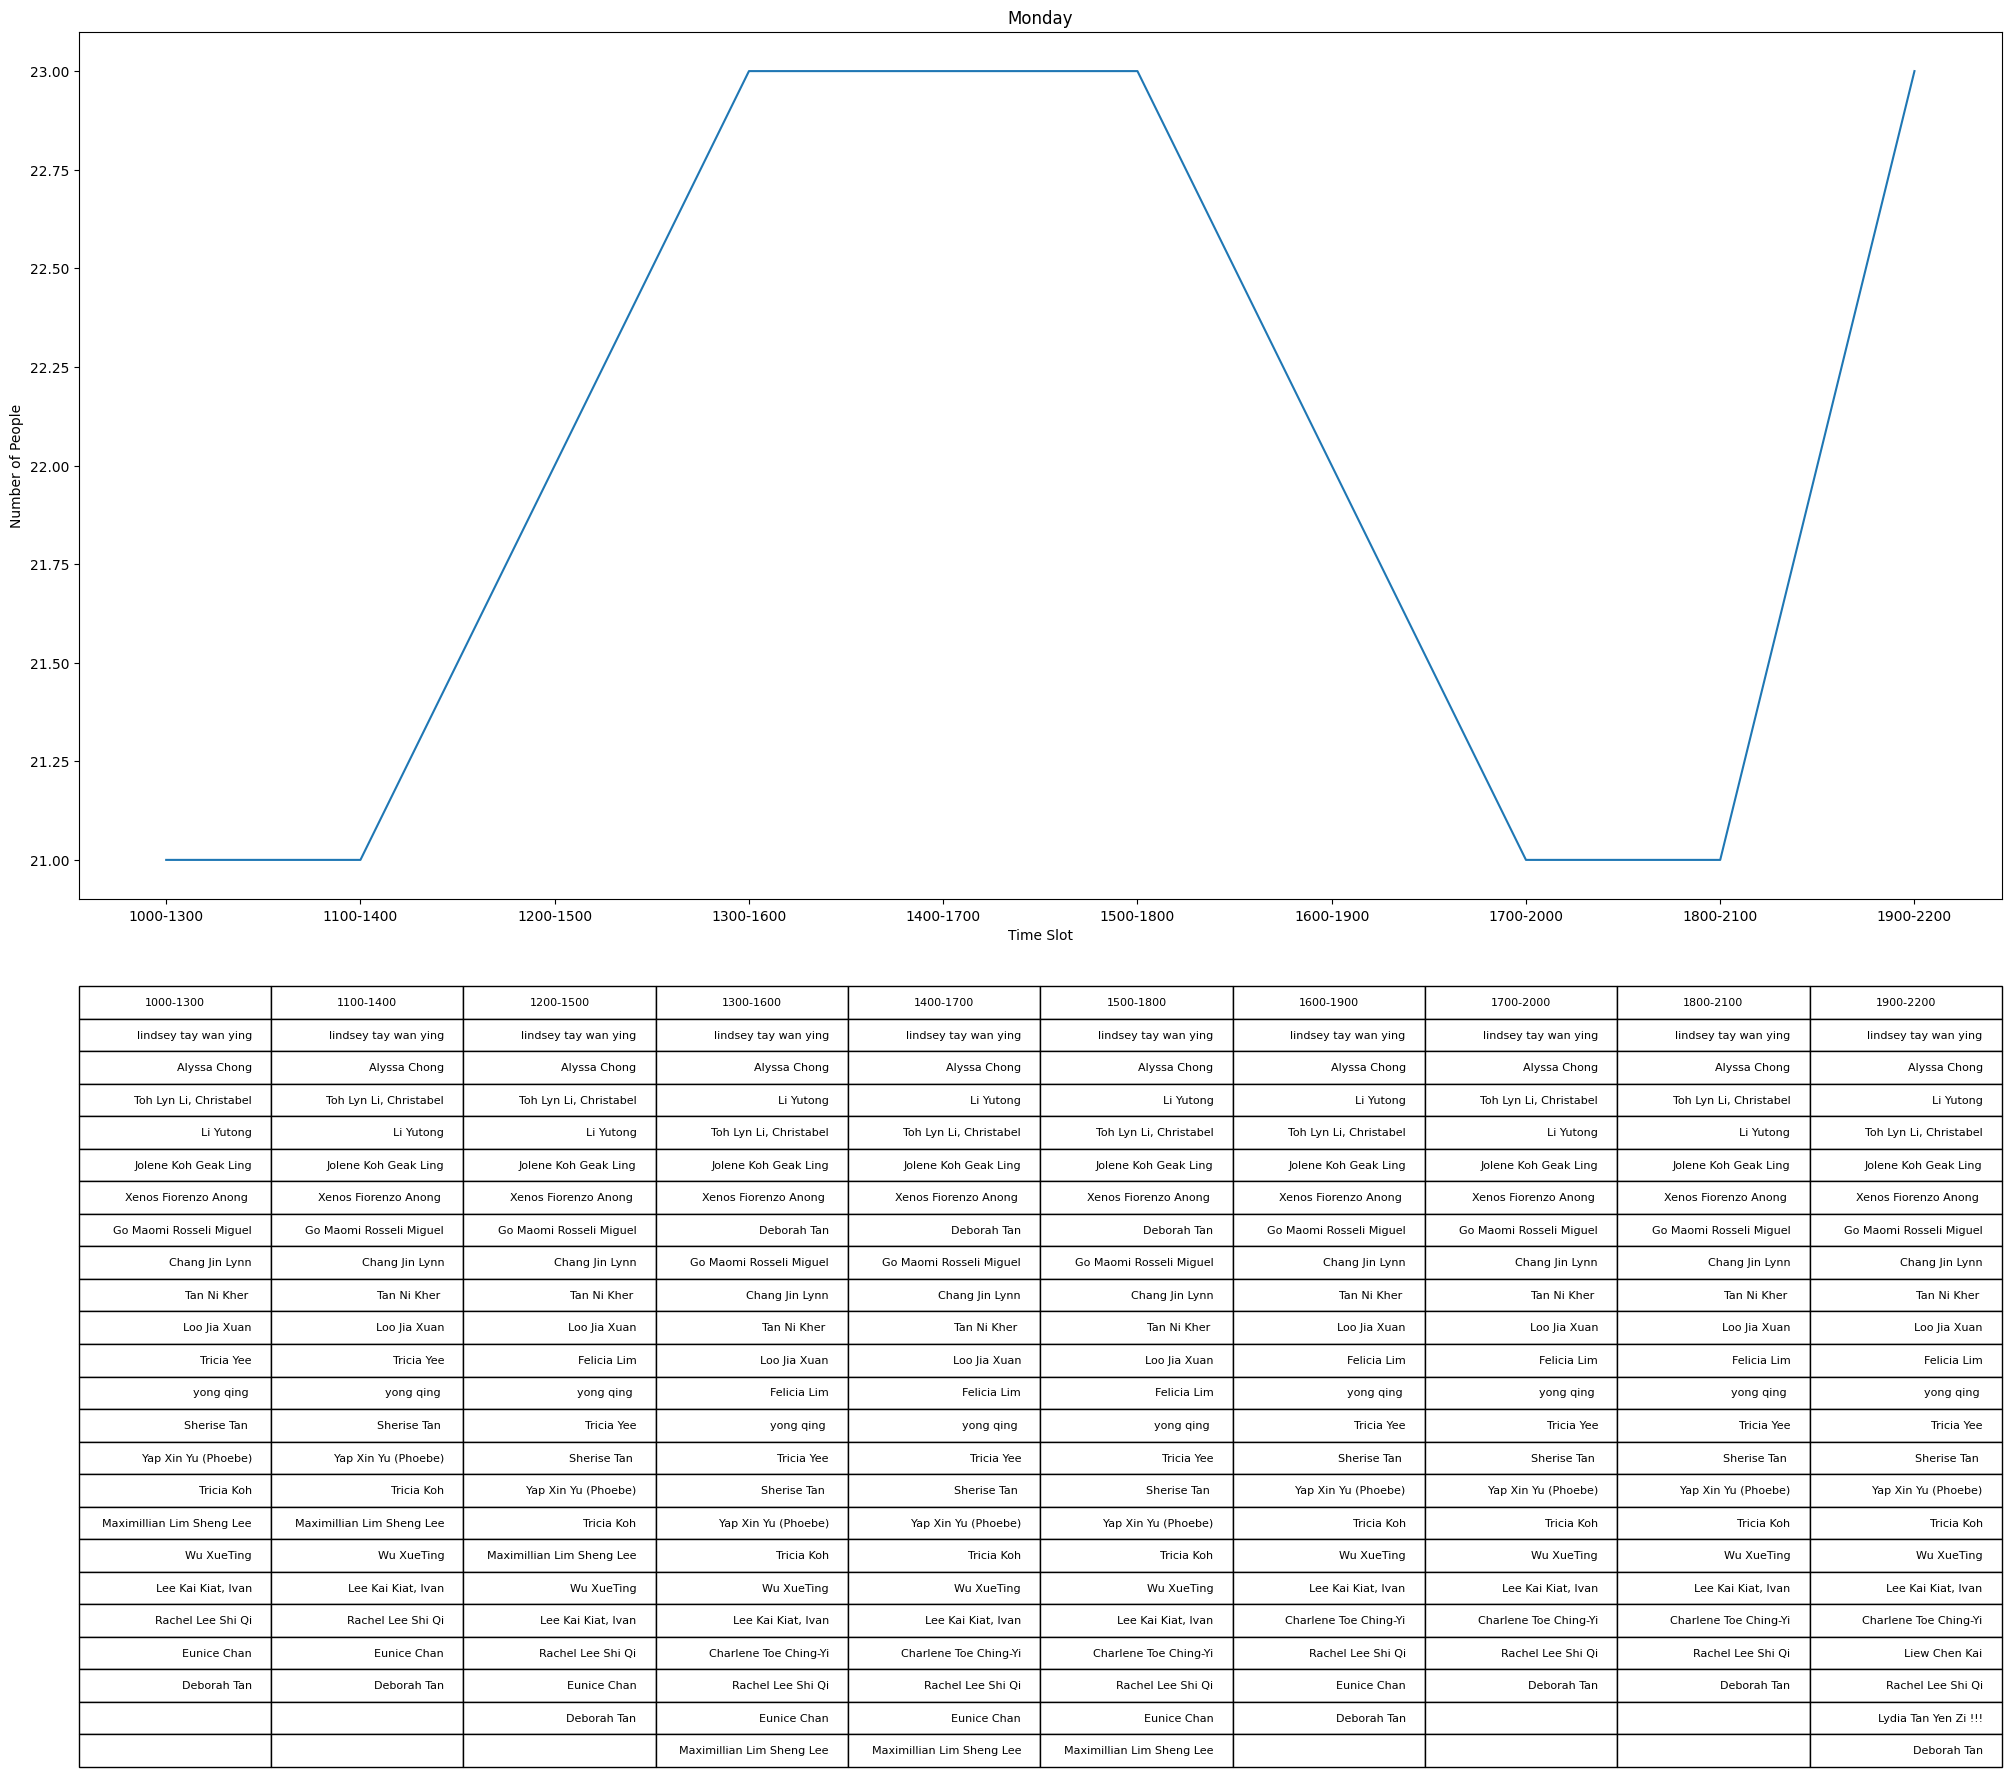

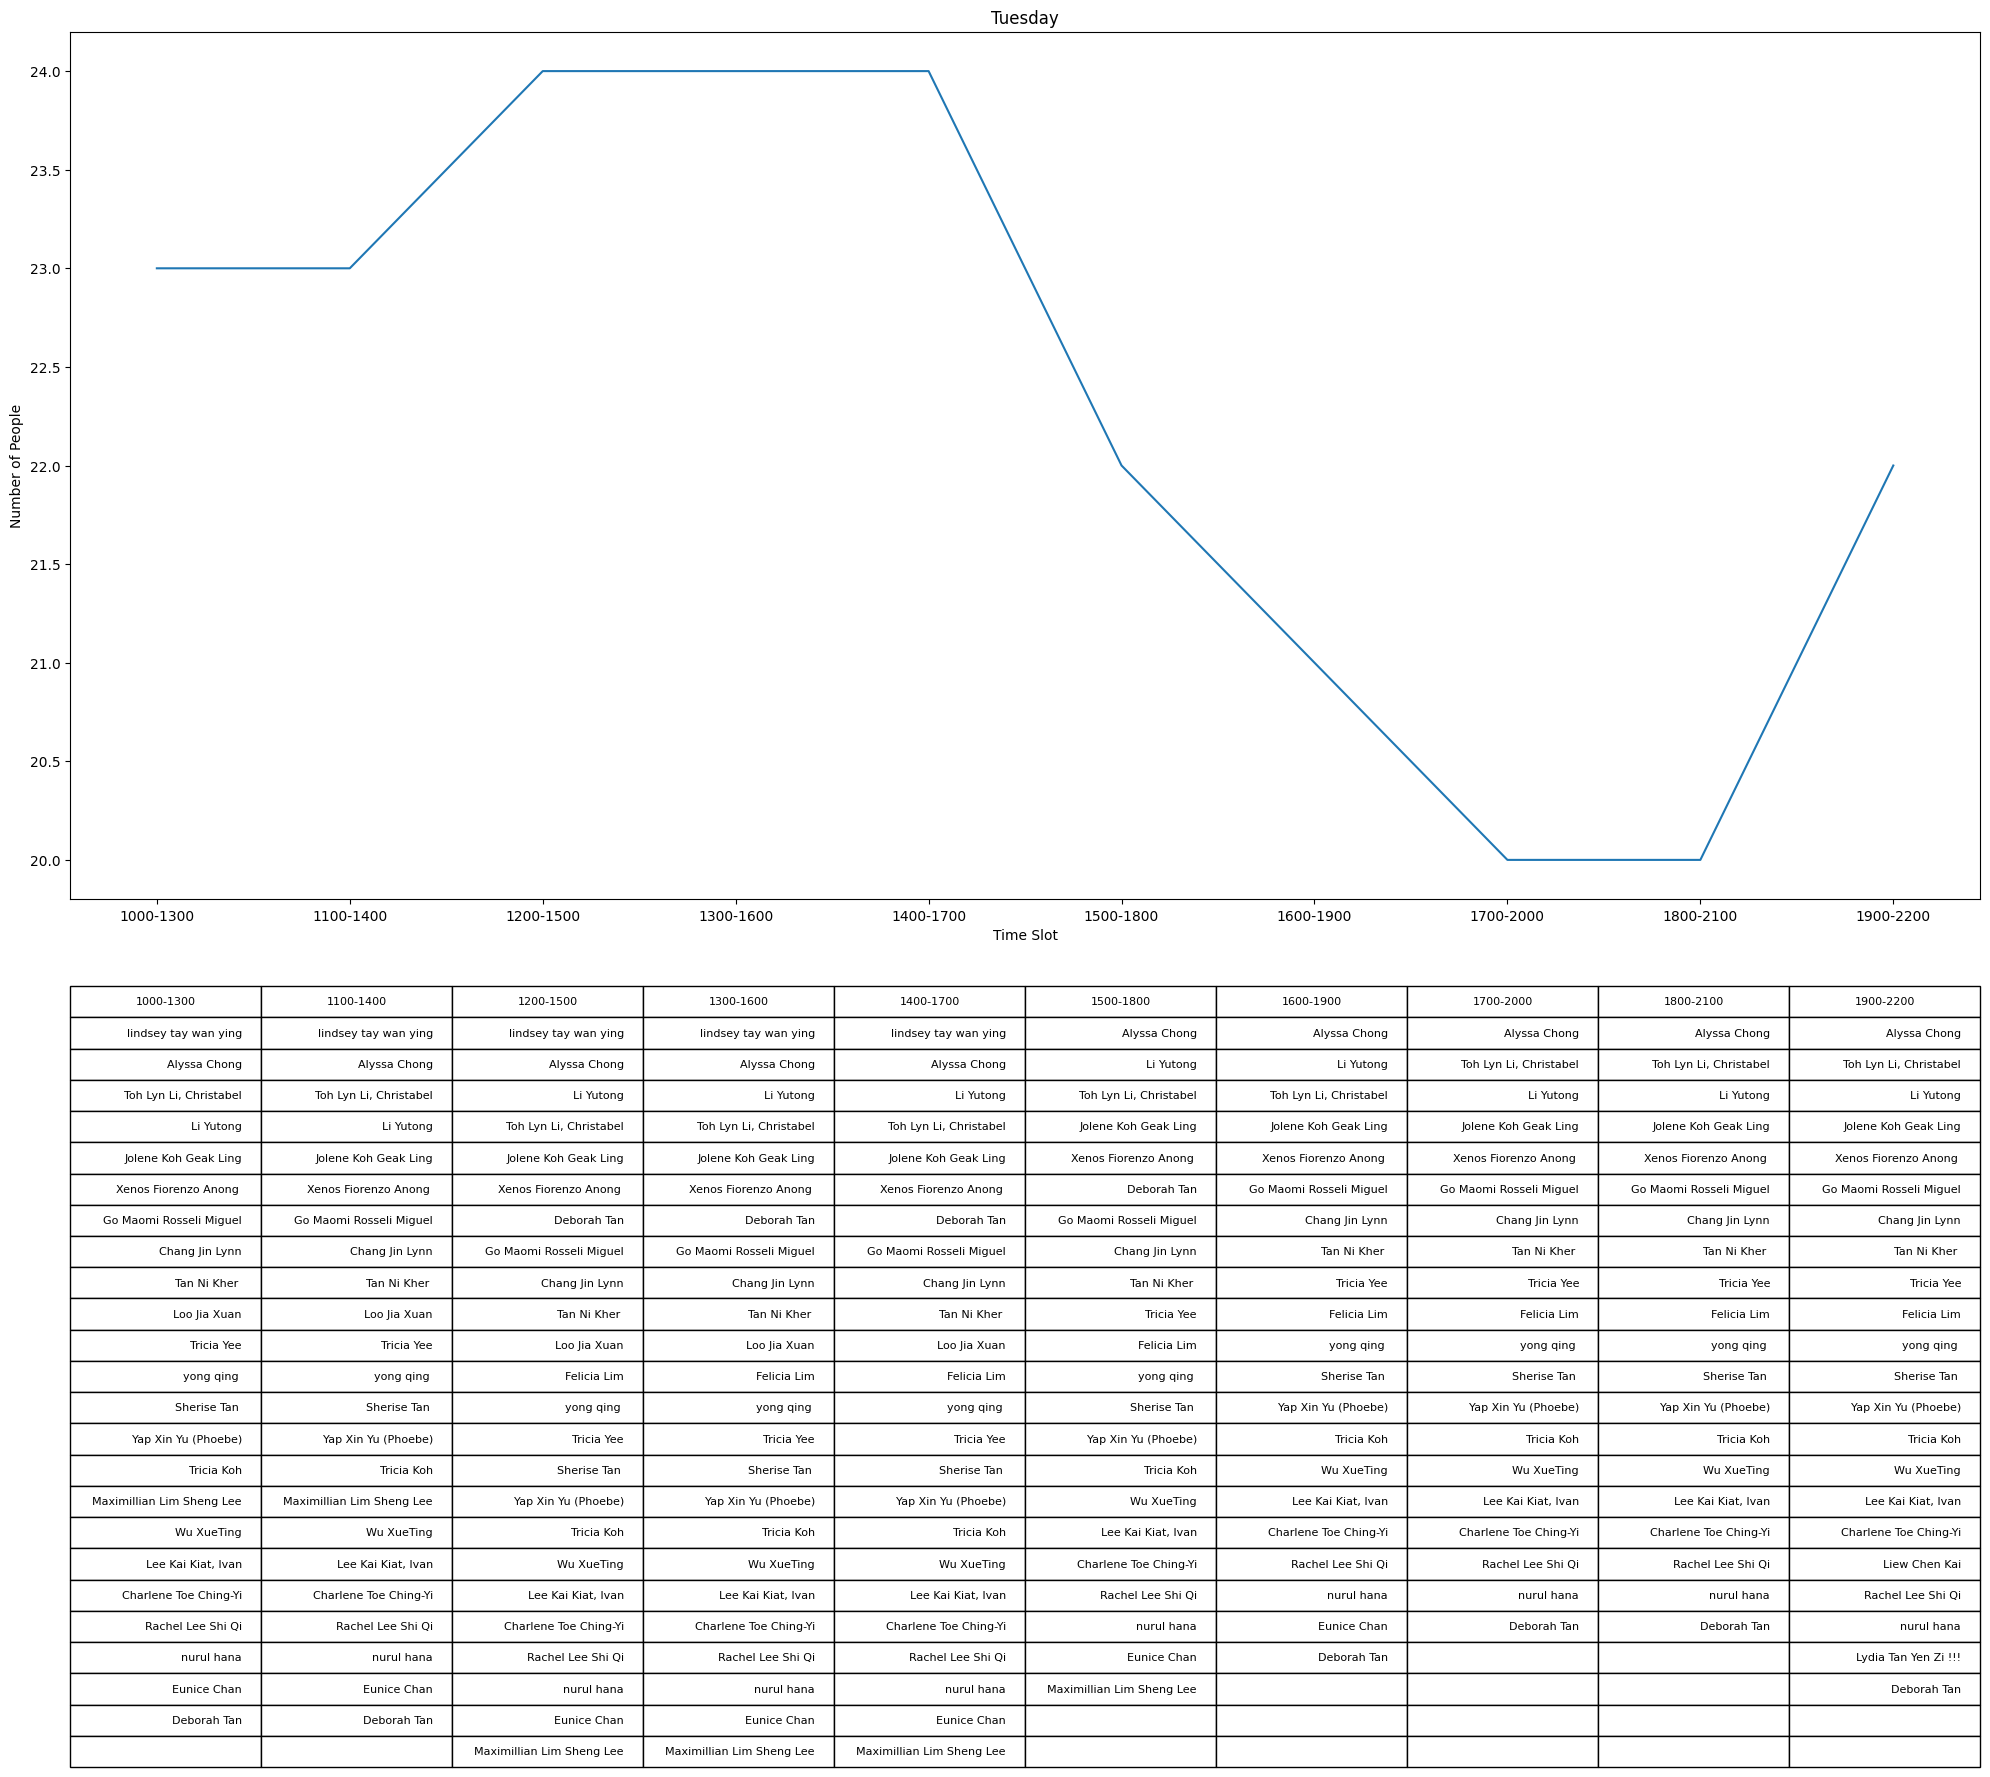

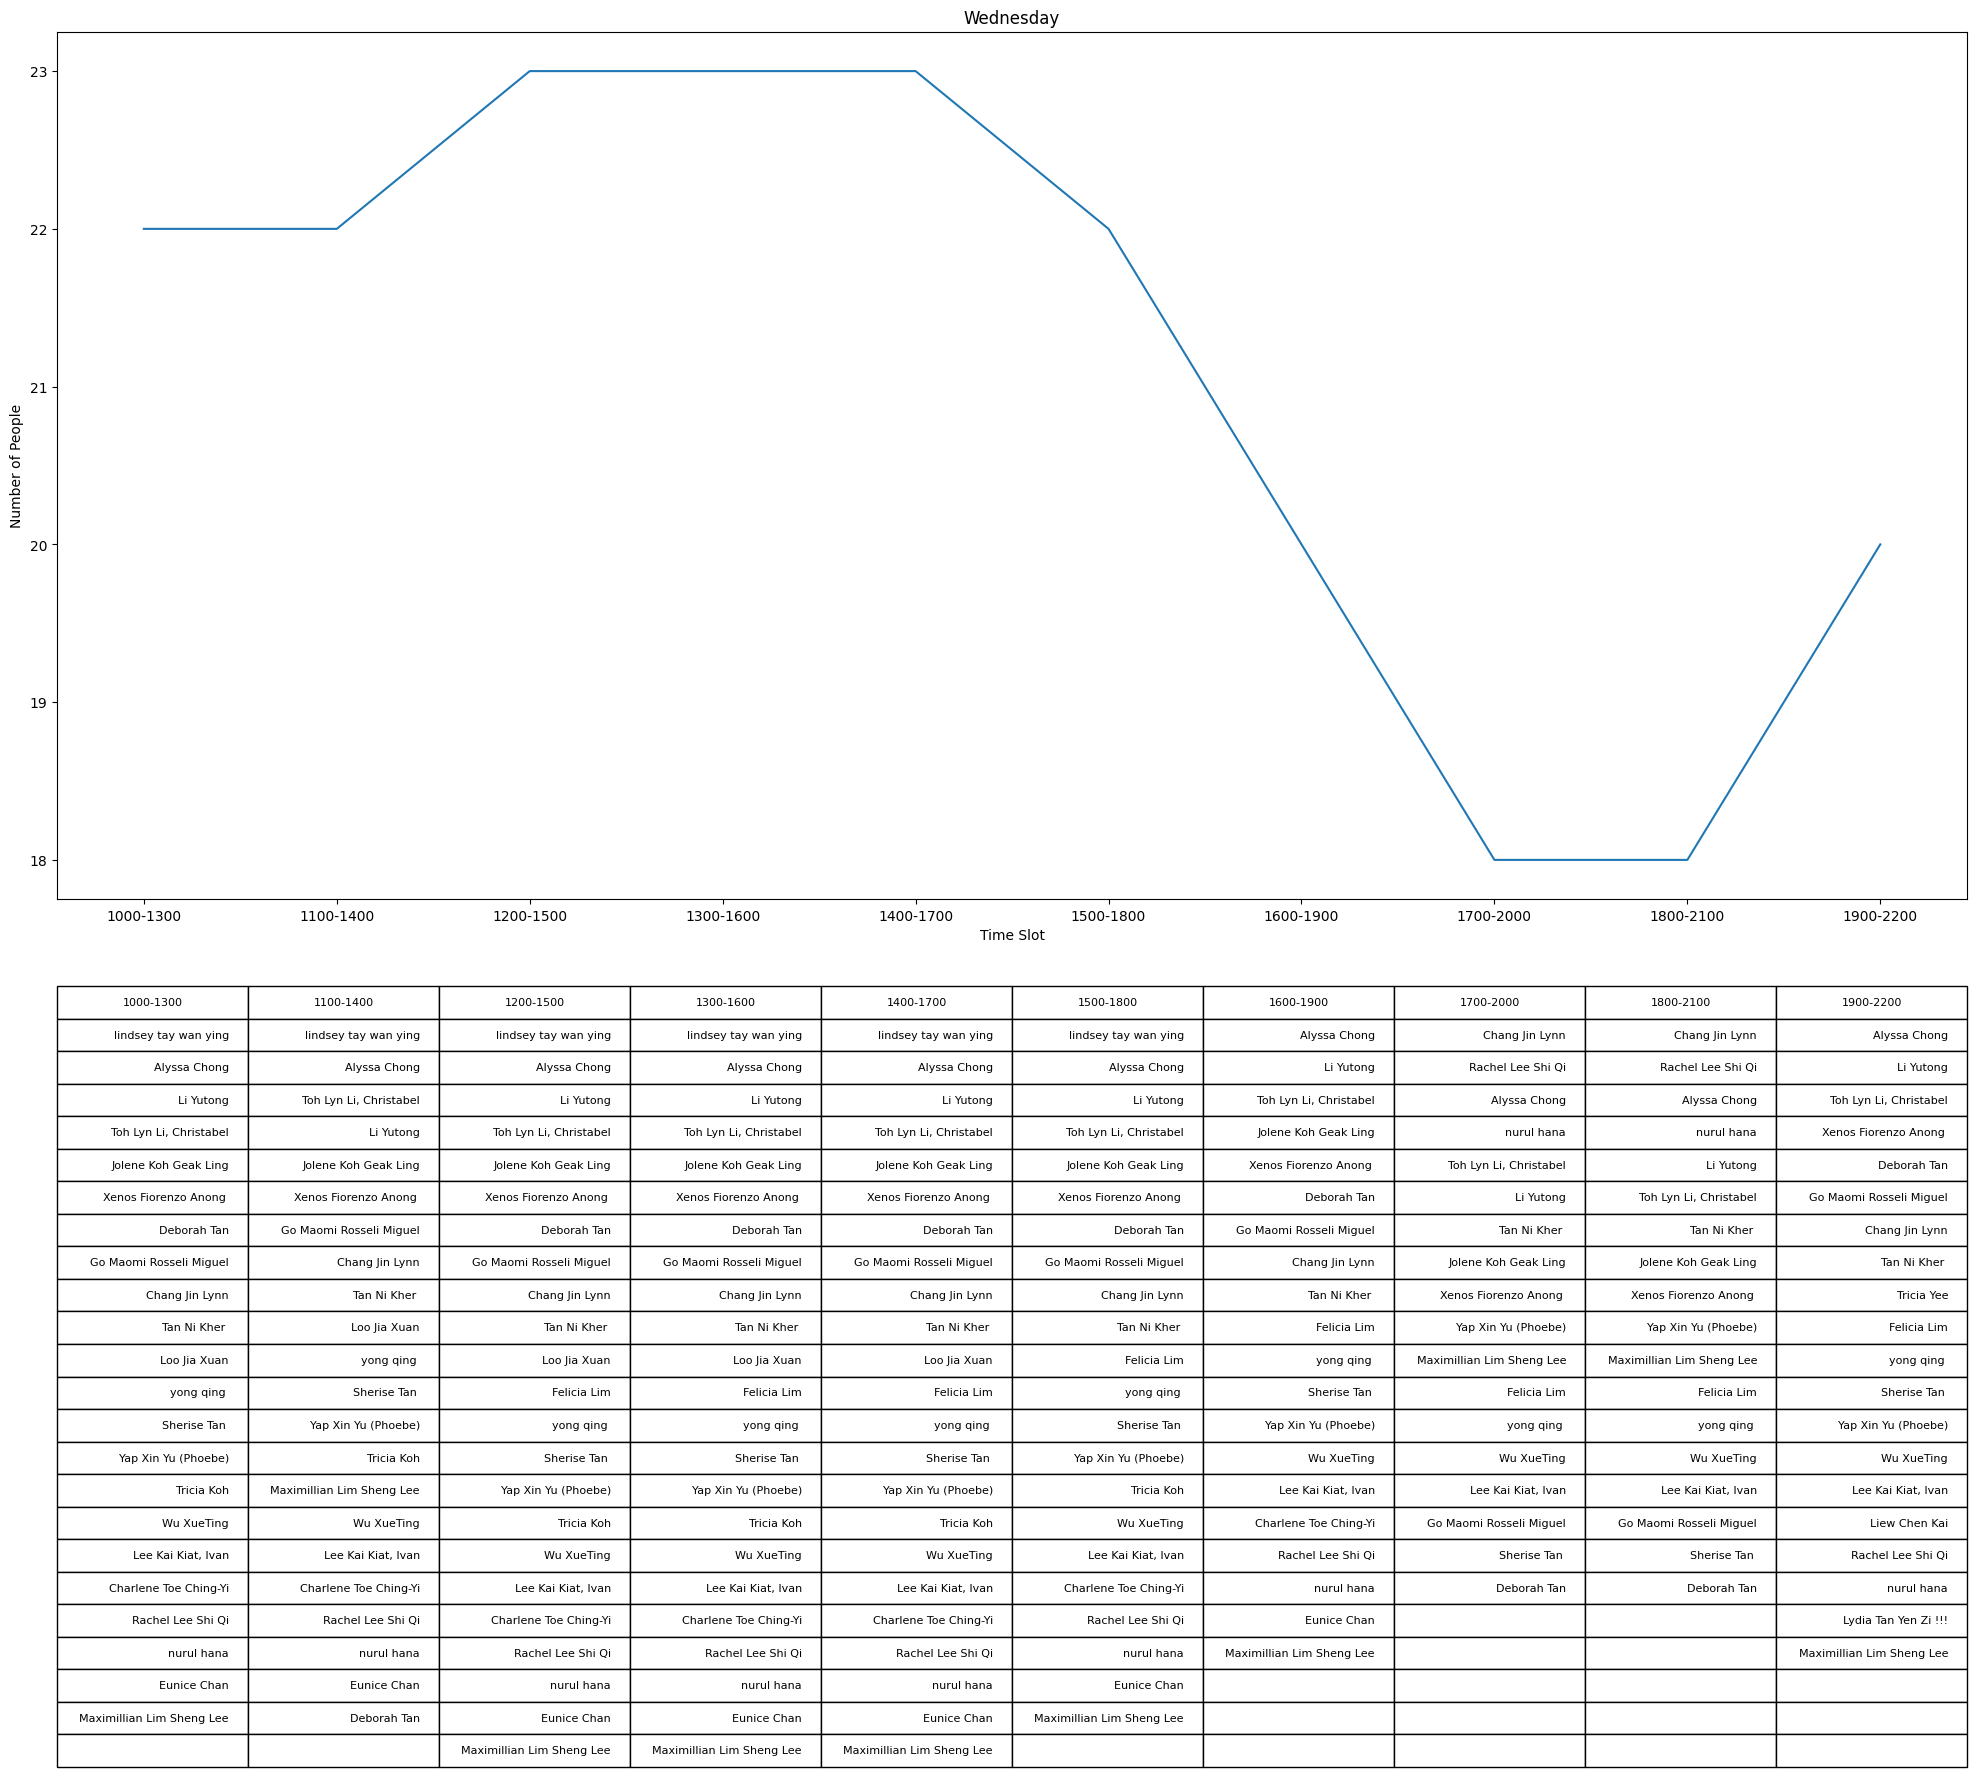

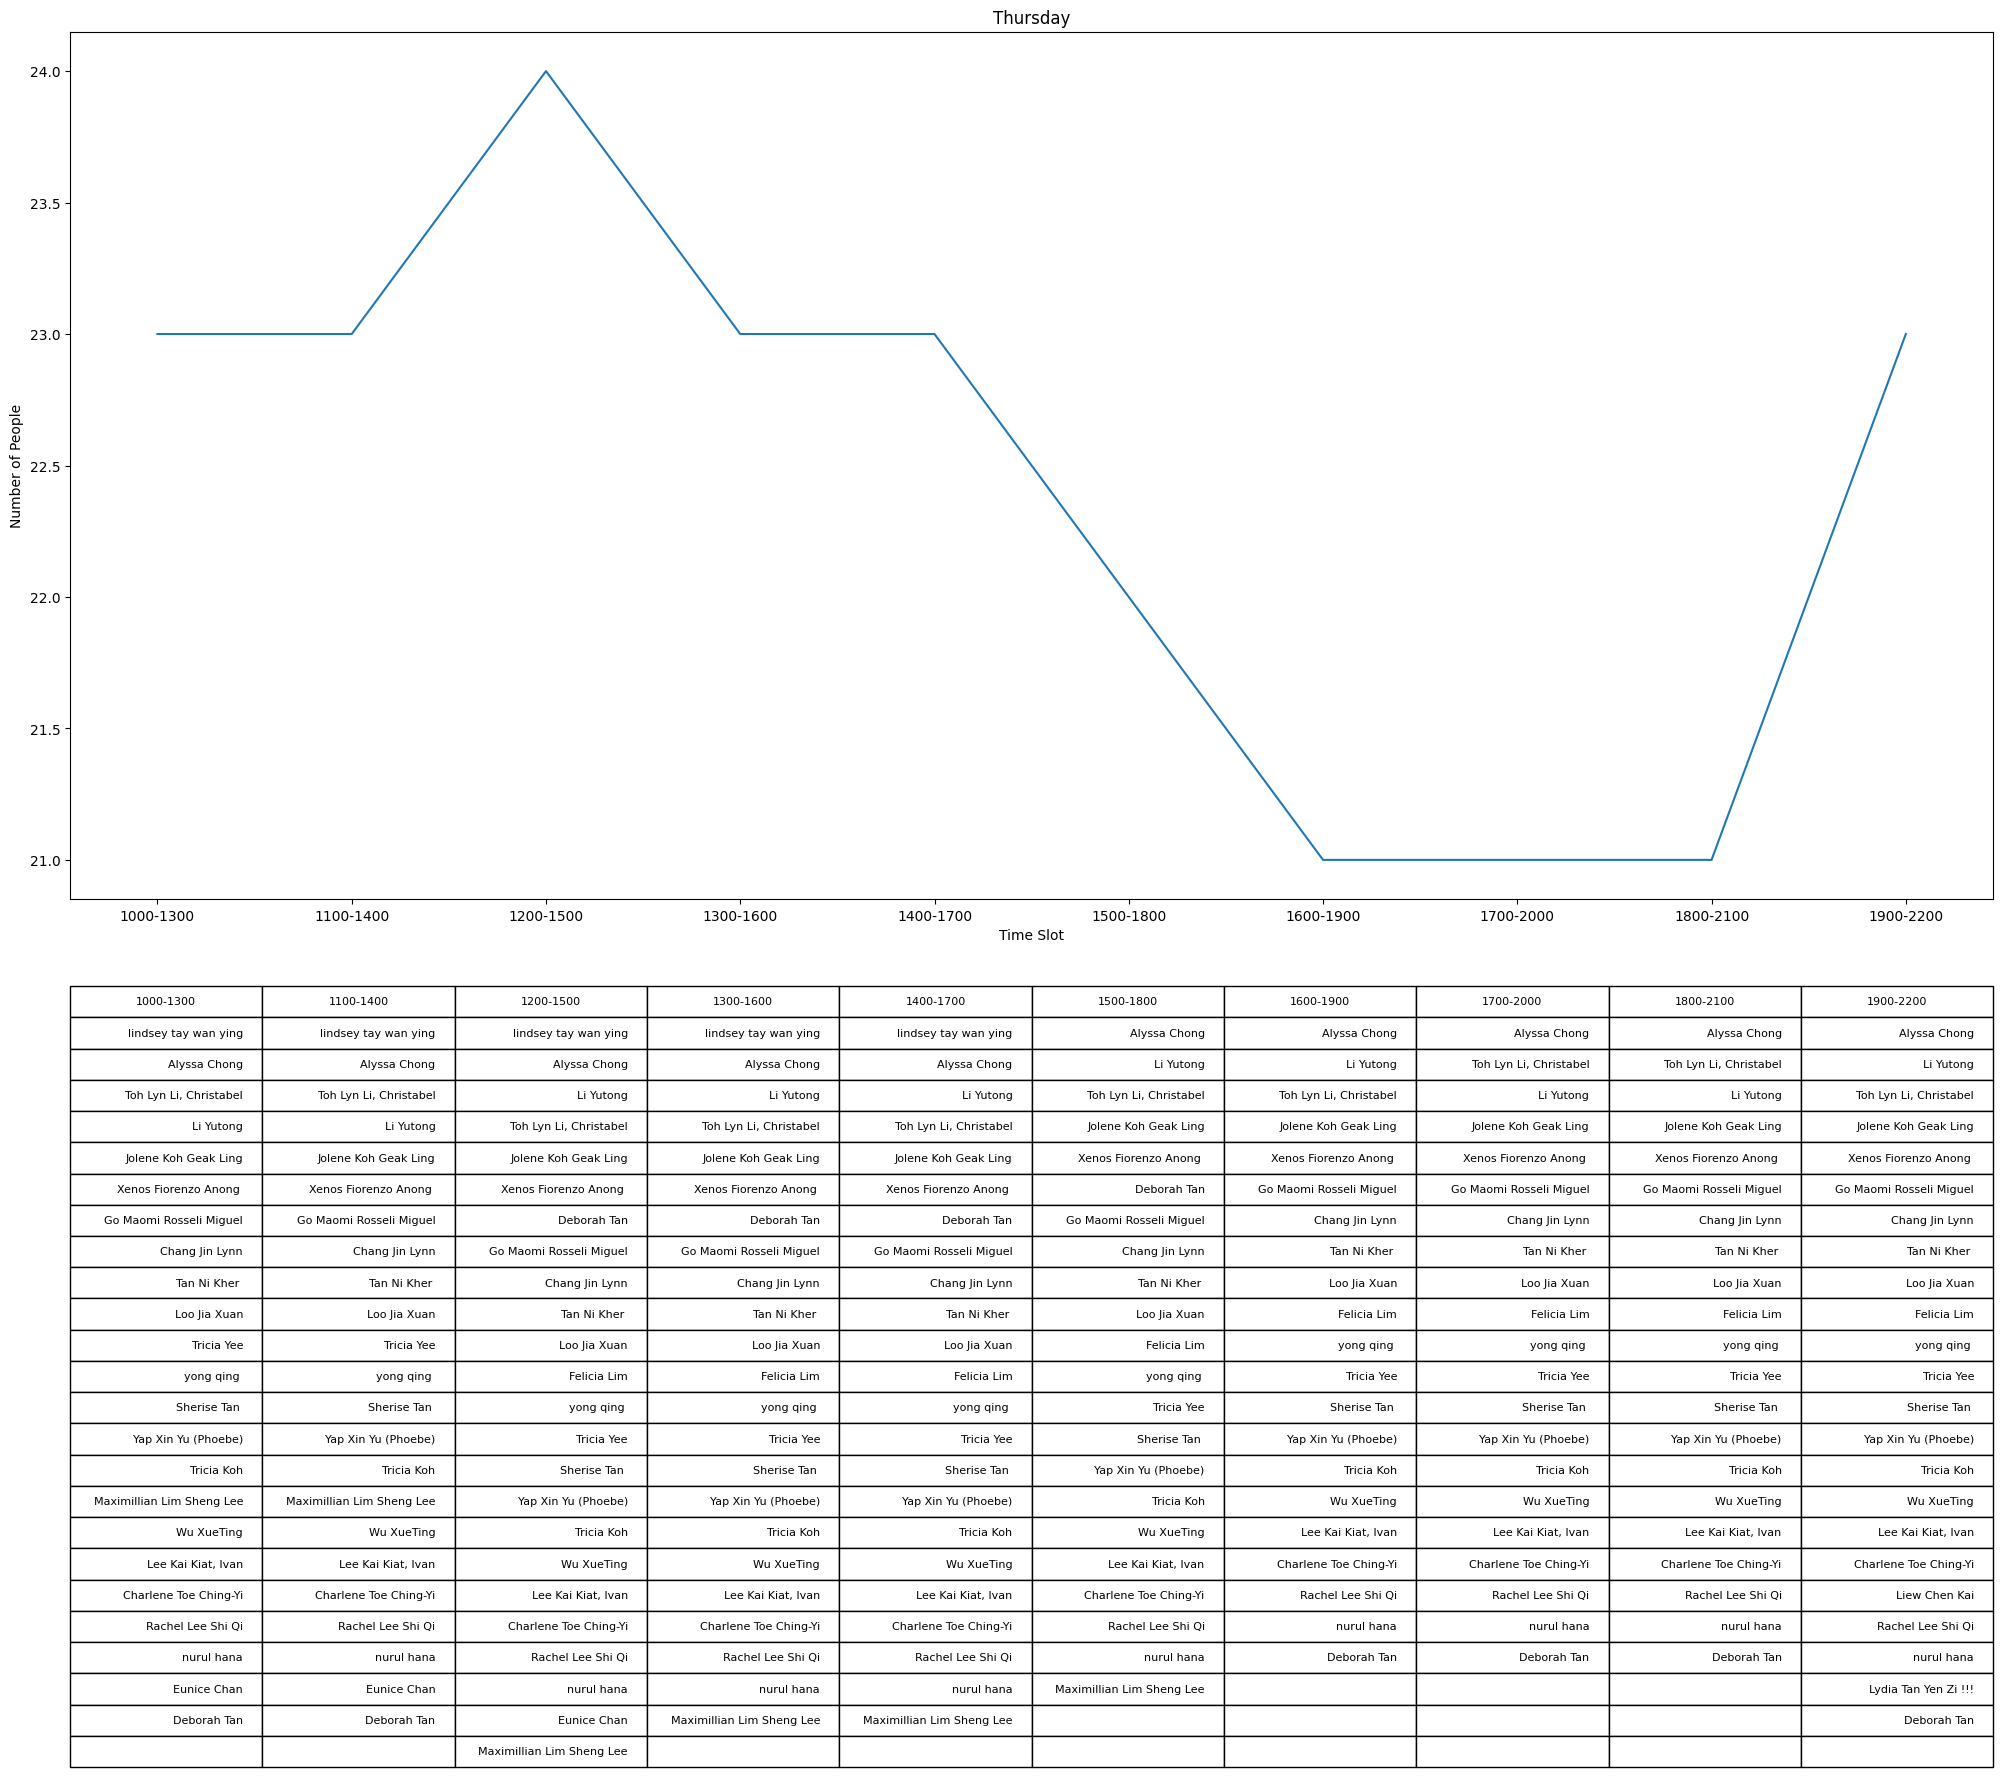

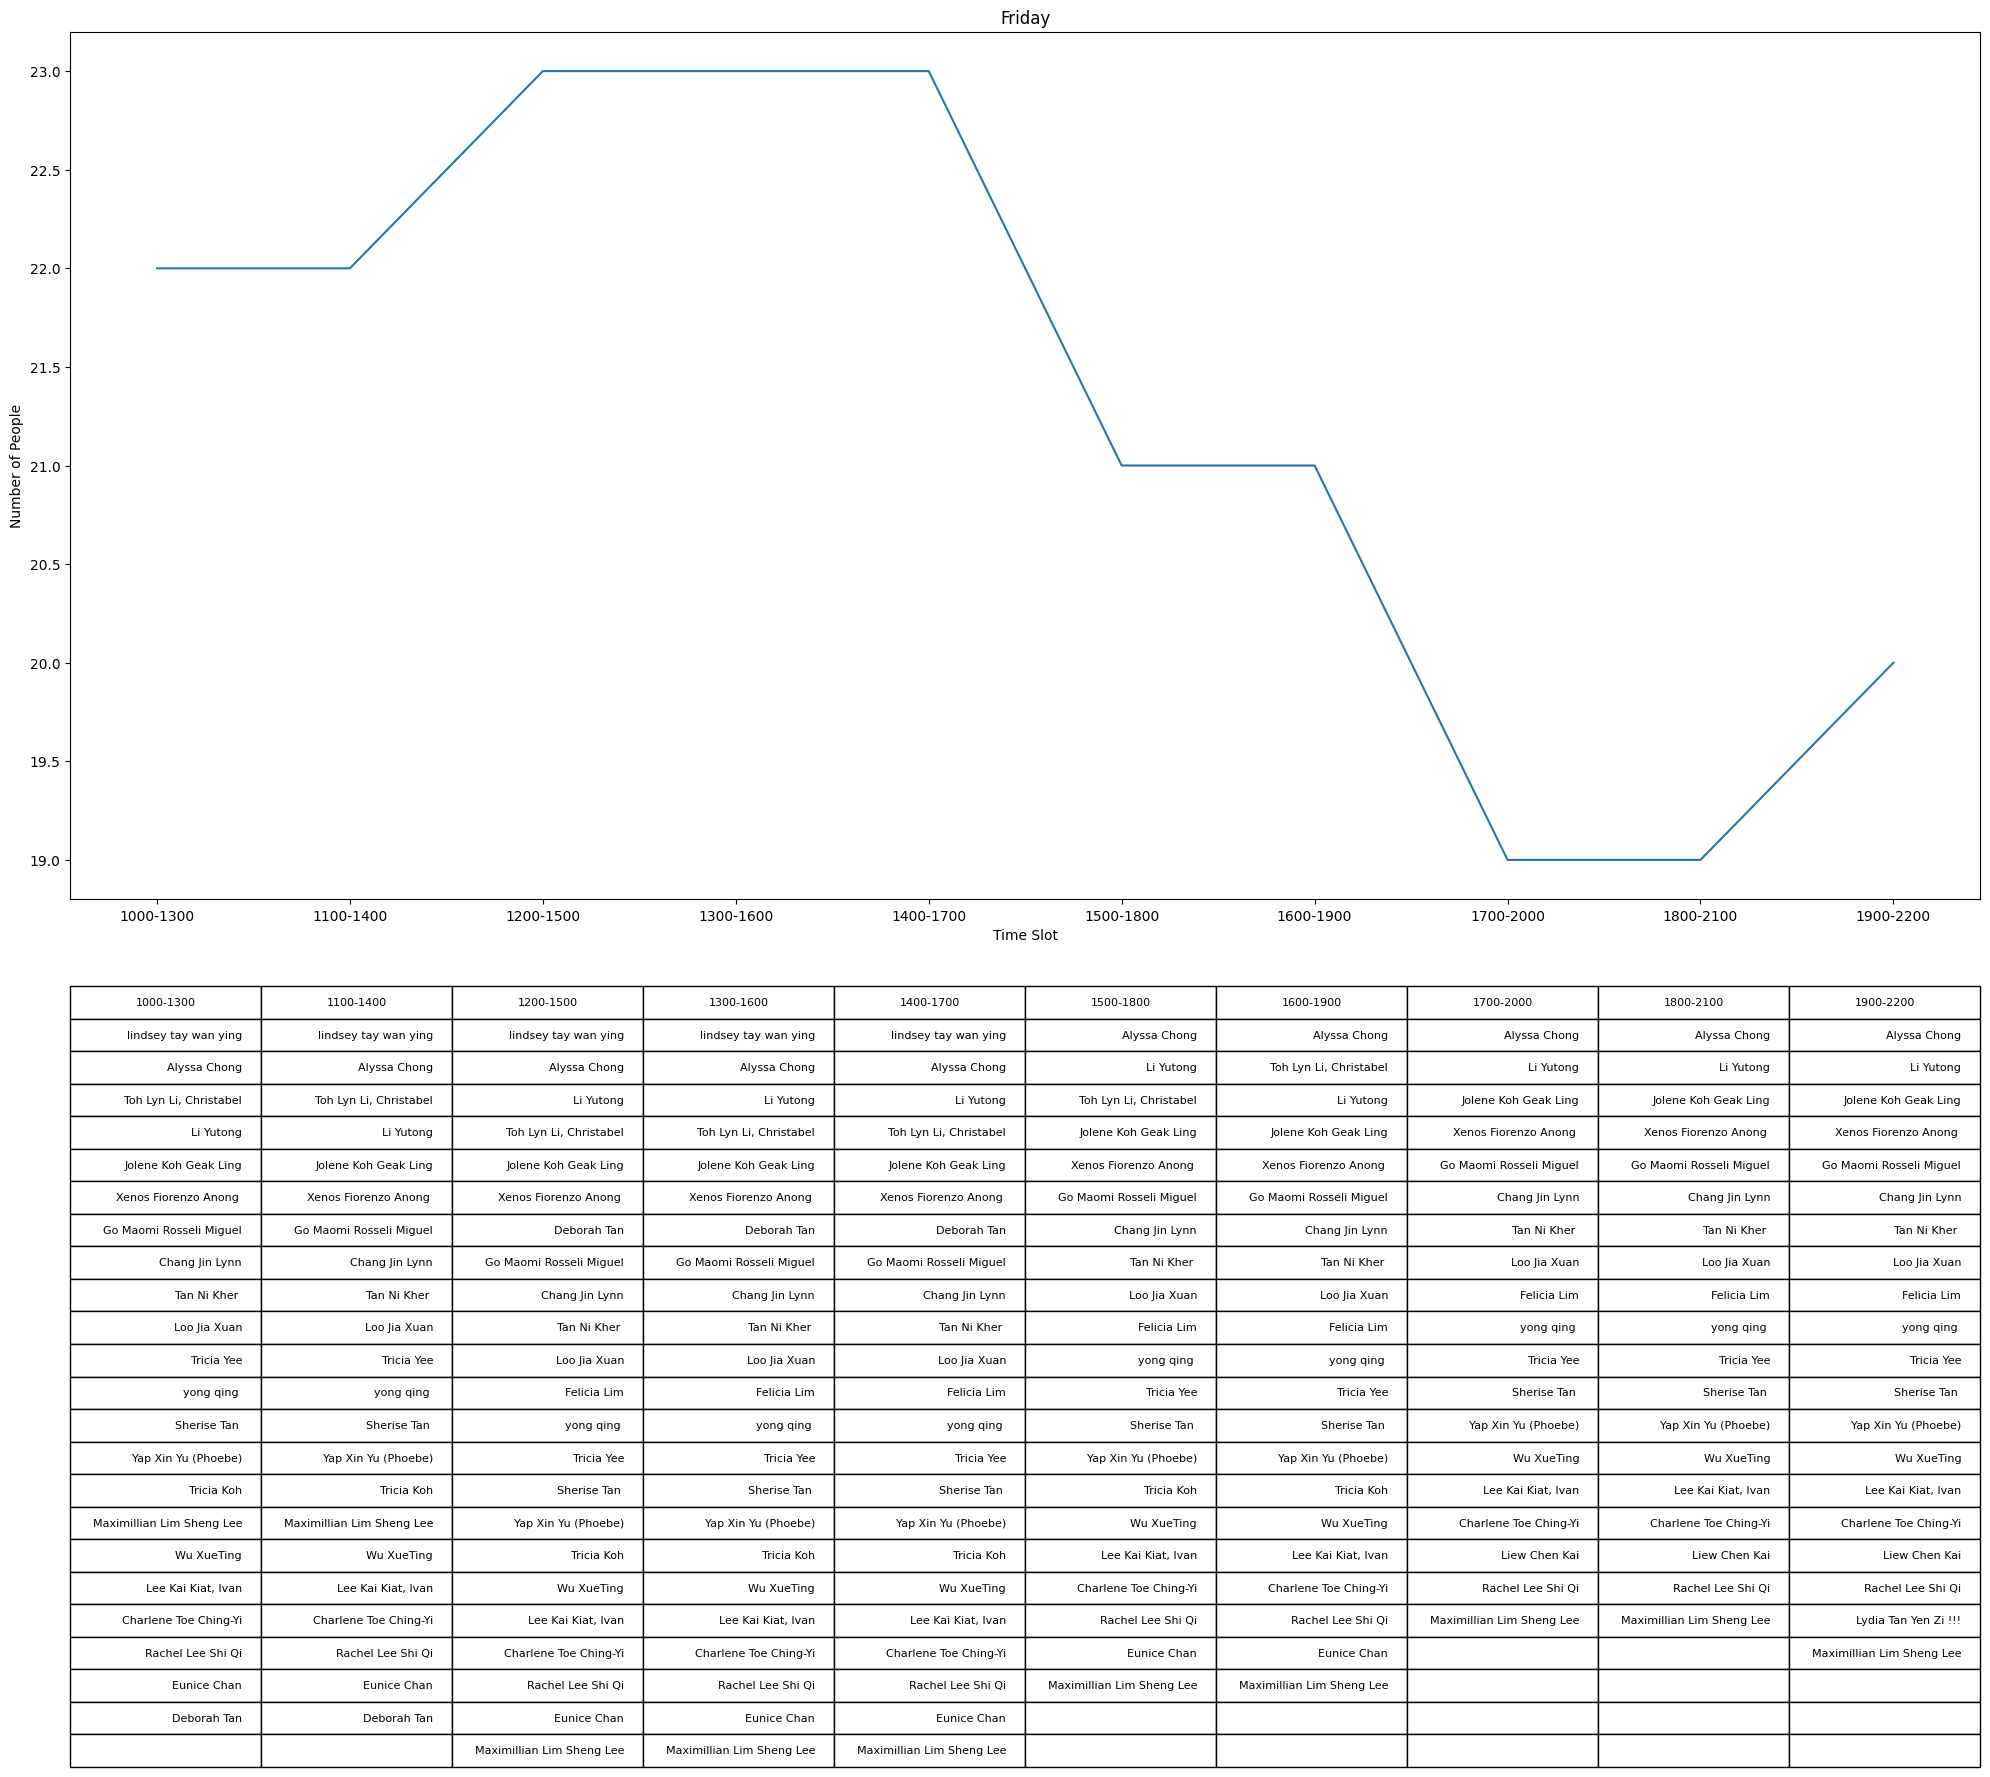

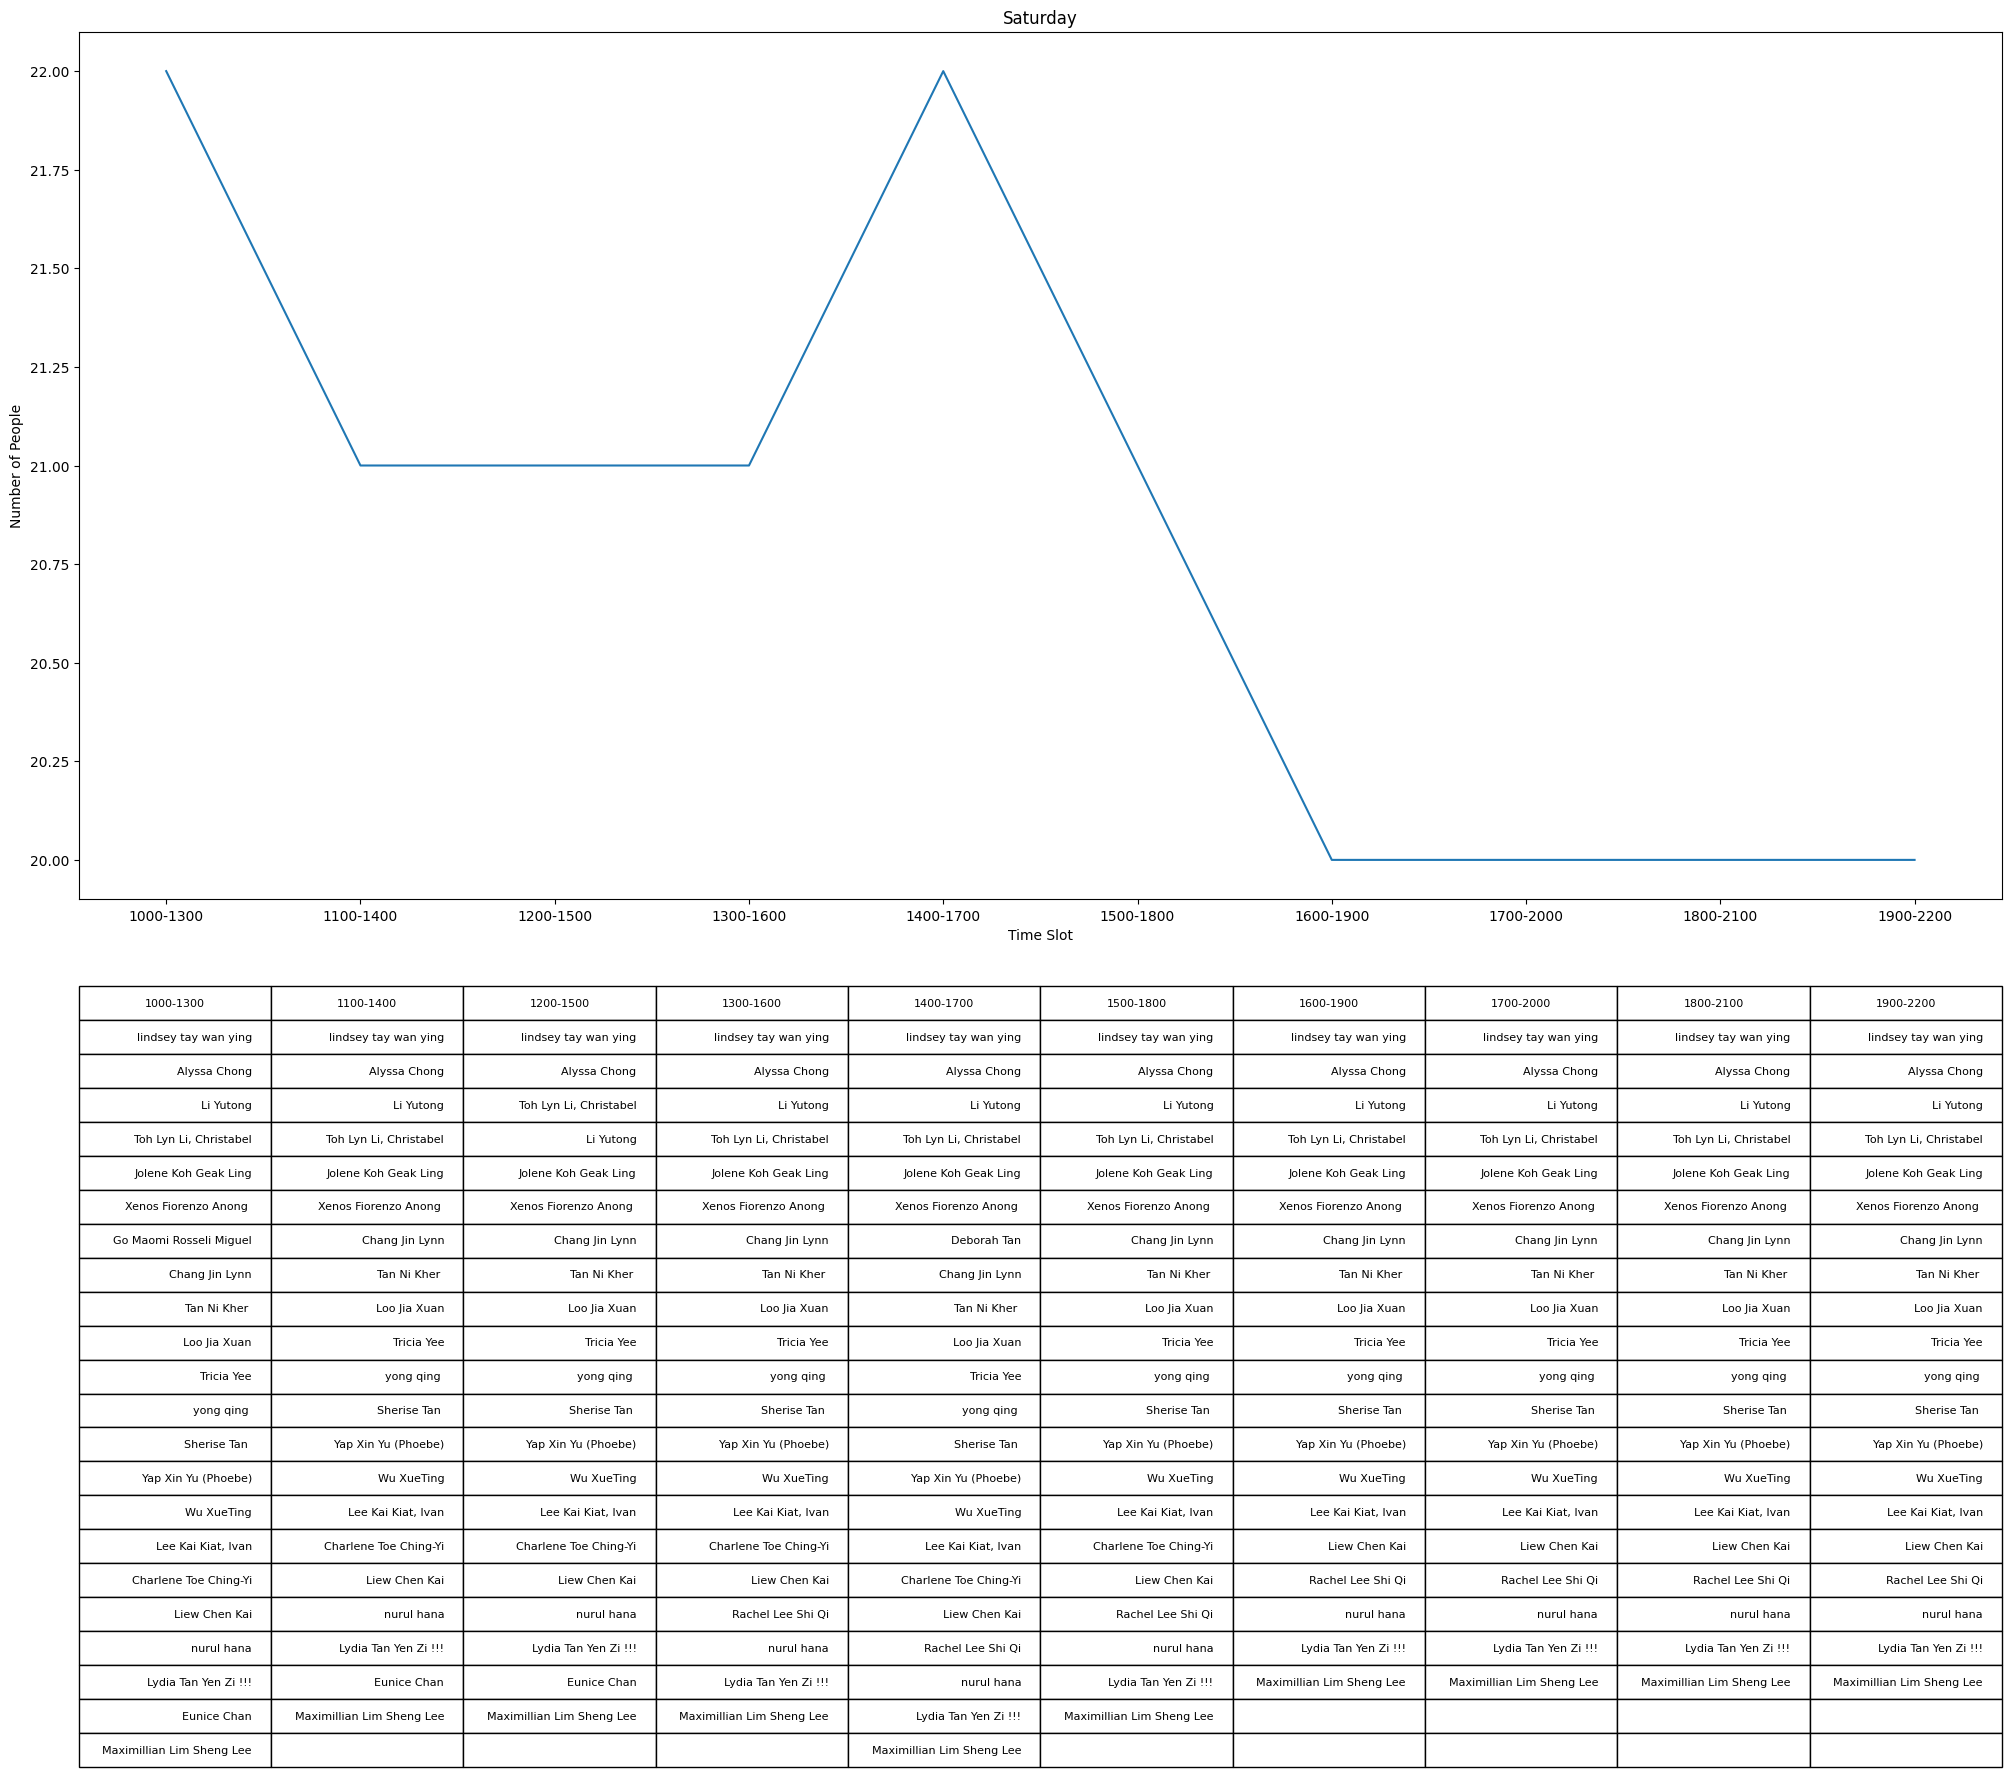

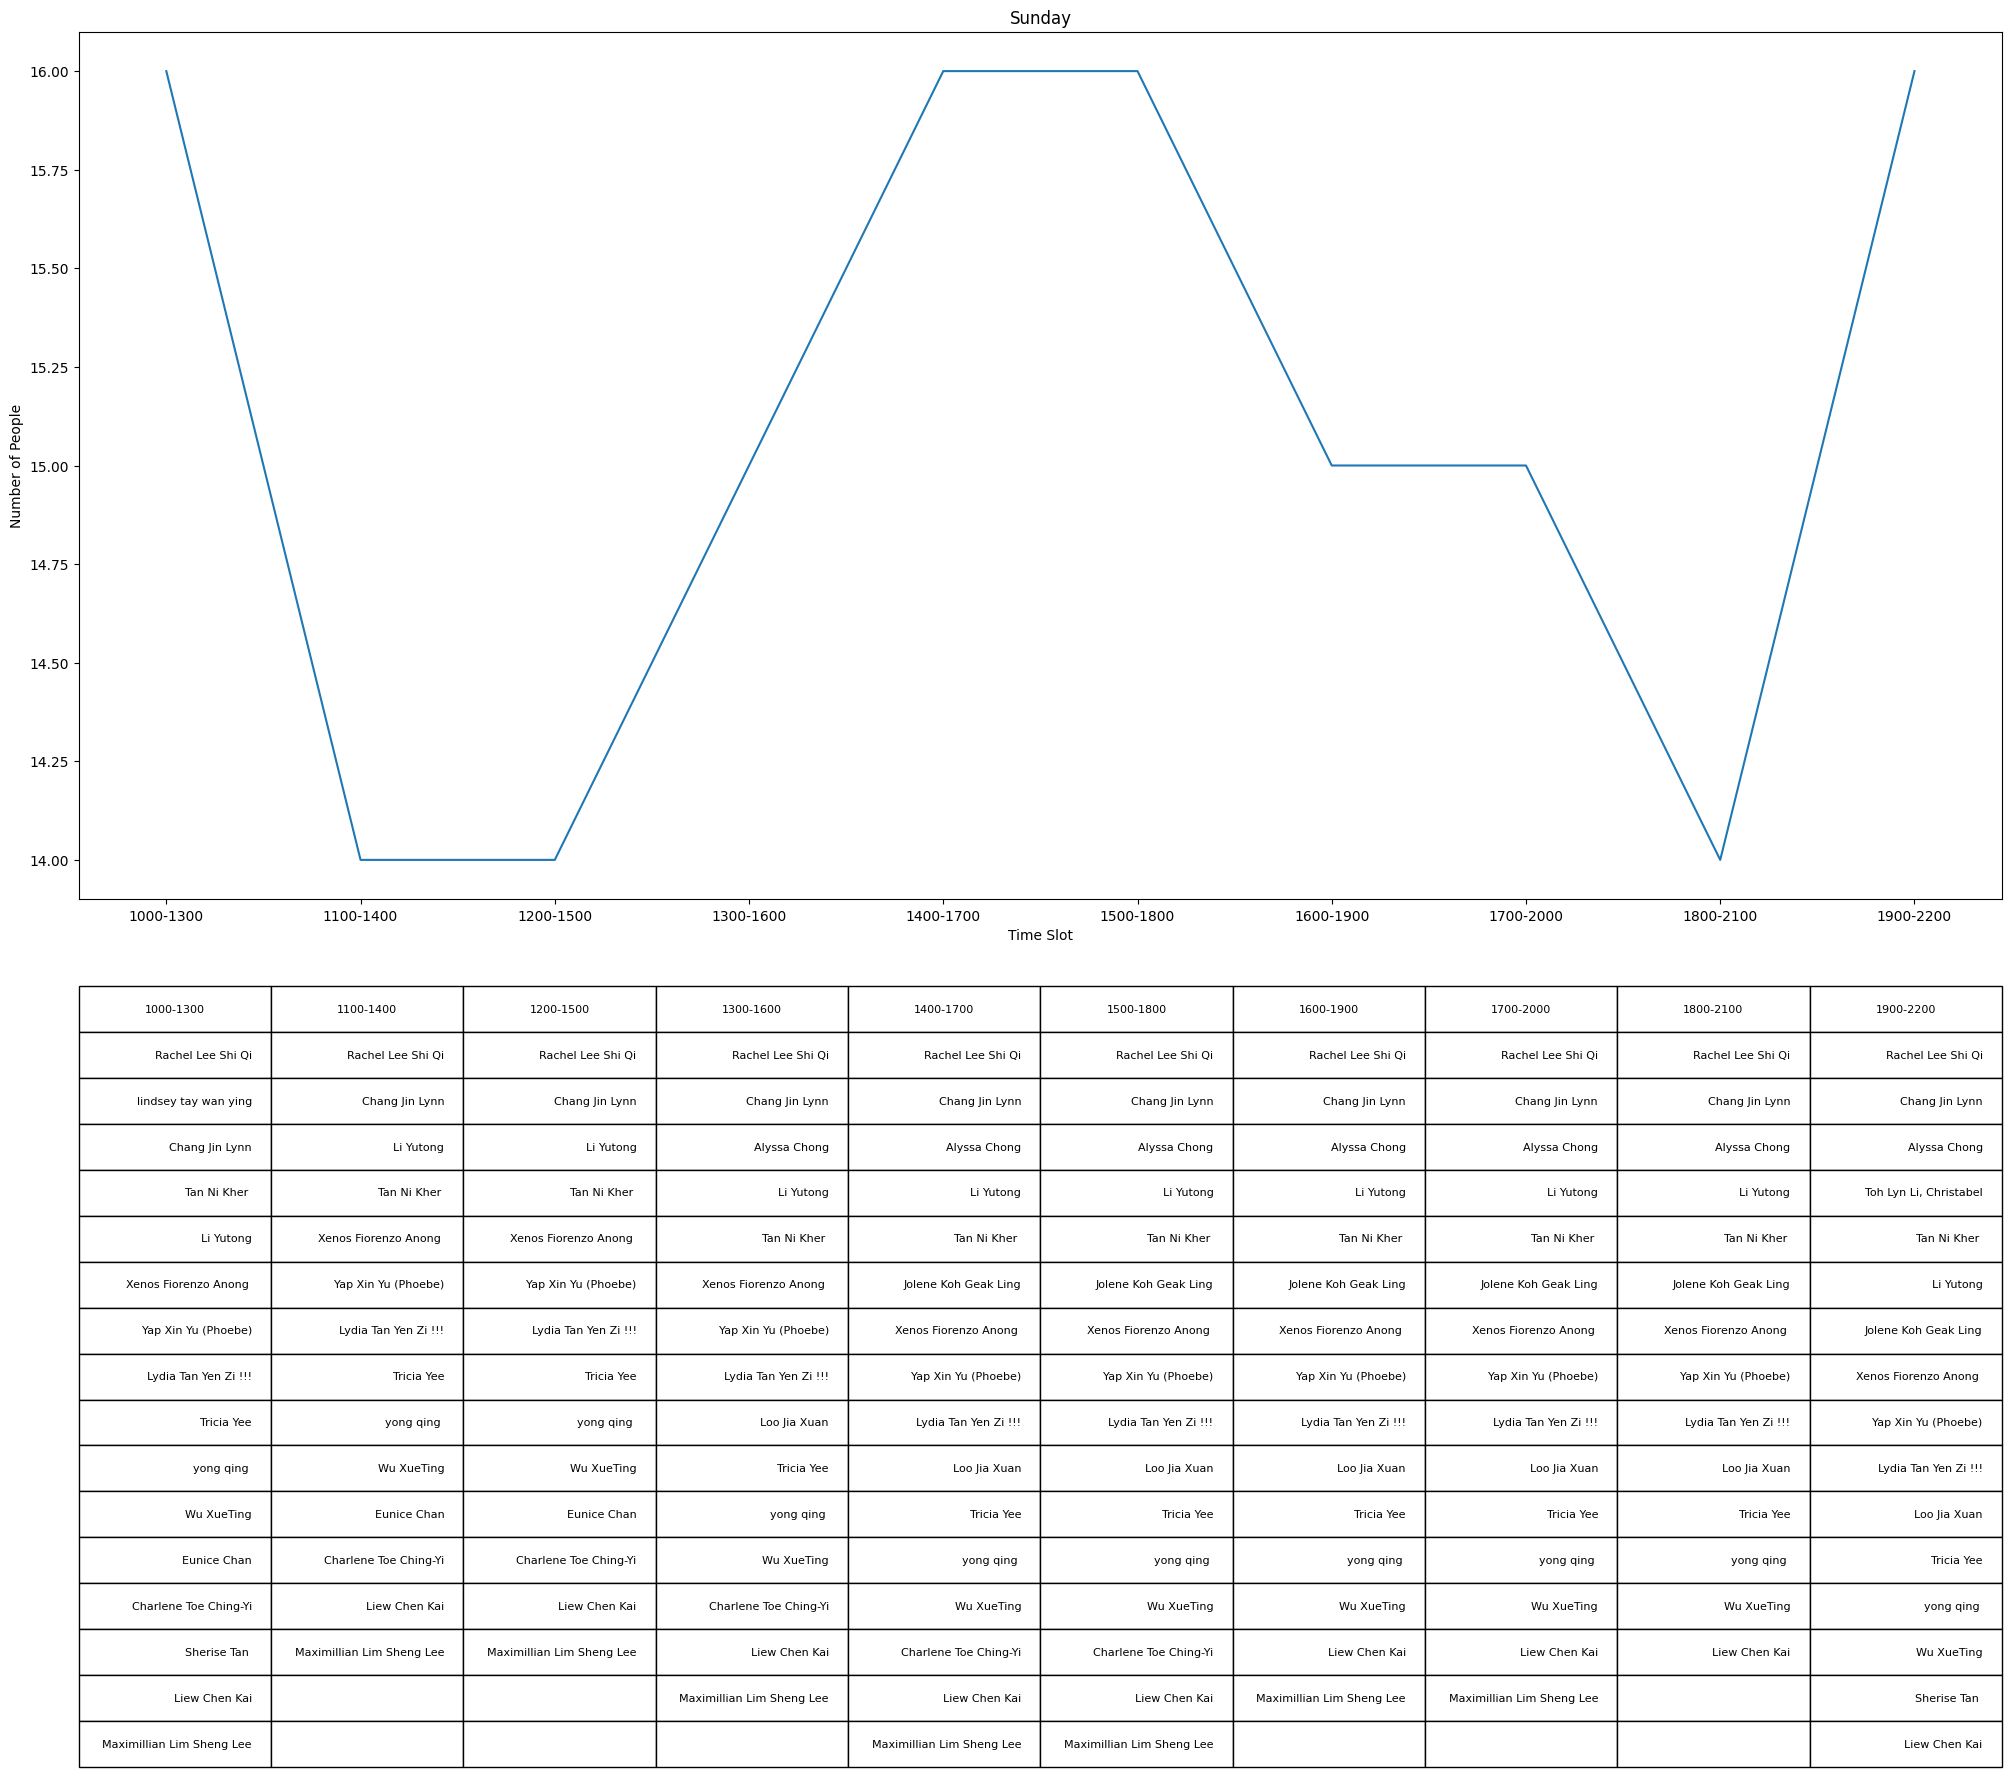

In [133]:
# graph out the number of people who are free at each time slot
# add a table below listing the names of people available at each slot
# monday
monday_num_people = []
monday_times = []
monday_people = []
for x in monday_possible_timeslots:
    monday_times.append(x.name)
    monday_num_people.append(len(x.people))
    monday_people.append(x.people)
monday_table = pd.DataFrame(monday_people, index=monday_times).transpose()


plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=0.8)
plt.plot(monday_times,monday_num_people)
table = plt.table(cellText=monday_table.values, colLabels=monday_table.columns, loc='bottom', bbox = [0, -1, 1, 0.9])
table.auto_set_font_size(False)
table.set_fontsize(8)
plt.ylabel('Number of People')
plt.xlabel('Time Slot')
plt.title('Monday')
plt.tight_layout()
plt.savefig('monday.png', bbox_inches='tight')
plt.show()


# tuesday
tuesday_num_people = []
tuesday_times = []
tuesday_people = []
for x in tuesday_possible_timeslots:
    tuesday_times.append(x.name)
    tuesday_num_people.append(len(x.people))
    tuesday_people.append(x.people)
tuesday_table = pd.DataFrame(tuesday_people, index=tuesday_times).transpose()

plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=0.8)
plt.plot(tuesday_times,tuesday_num_people)
table = plt.table(cellText=tuesday_table.values, colLabels=tuesday_table.columns, loc='bottom', bbox = [0, -1, 1, 0.9])
table.auto_set_font_size(False)
table.set_fontsize(8)
plt.ylabel('Number of People')
plt.xlabel('Time Slot')
plt.title('Tuesday')
plt.tight_layout()
plt.savefig('tuesday.png', bbox_inches='tight')
plt.show()

# wednesday
wednesday_num_people = []
wednesday_times = []
wednesday_people = []
for x in wednesday_possible_timeslots:
    wednesday_times.append(x.name)
    wednesday_num_people.append(len(x.people))
    wednesday_people.append(x.people)
wednesday_table = pd.DataFrame(wednesday_people, index=wednesday_times).transpose()

plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=0.8)
plt.plot(wednesday_times,wednesday_num_people)
table = plt.table(cellText=wednesday_table.values, colLabels=wednesday_table.columns, loc='bottom', bbox = [0, -1, 1, 0.9])
table.auto_set_font_size(False)
table.set_fontsize(8)
plt.ylabel('Number of People')
plt.xlabel('Time Slot')
plt.title('Wednesday')
plt.tight_layout()
plt.savefig('wednesday.png', bbox_inches='tight')
plt.show()

# thursday
thursday_num_people = []
thursday_times = []
thursday_people = []
for x in thursday_possible_timeslots:
    thursday_times.append(x.name)
    thursday_num_people.append(len(x.people))
    thursday_people.append(x.people)
thursday_table = pd.DataFrame(thursday_people, index=thursday_times).transpose()

plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=0.8)
plt.plot(thursday_times,thursday_num_people)
table = plt.table(cellText=thursday_table.values, colLabels=thursday_table.columns, loc='bottom', bbox = [0, -1, 1, 0.9])
table.auto_set_font_size(False)
table.set_fontsize(8)
plt.ylabel('Number of People')
plt.xlabel('Time Slot')
plt.title('Thursday')
plt.tight_layout()
plt.savefig('thursday.png', bbox_inches='tight')
plt.show()

# friday
friday_num_people = []
friday_times = []
friday_people = []
for x in friday_possible_timeslots:
    friday_times.append(x.name)
    friday_num_people.append(len(x.people))
    friday_people.append(x.people)
friday_table = pd.DataFrame(friday_people, index=friday_times).transpose()

plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=0.8)
plt.plot(friday_times,friday_num_people)
table = plt.table(cellText=friday_table.values, colLabels=friday_table.columns, loc='bottom', bbox = [0, -1, 1, 0.9])
table.auto_set_font_size(False)
table.set_fontsize(8)
plt.ylabel('Number of People')
plt.xlabel('Time Slot')
plt.title('Friday')
plt.tight_layout()
plt.savefig('friday.png', bbox_inches='tight')
plt.show()

# saturday
saturday_num_people = []
saturday_times = []
saturday_people = []
for x in saturday_possible_timeslots:
    saturday_times.append(x.name)
    saturday_num_people.append(len(x.people))
    saturday_people.append(x.people)
saturday_table = pd.DataFrame(saturday_people, index=saturday_times).transpose()

plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=0.8)
plt.plot(saturday_times,saturday_num_people)
table = plt.table(cellText=saturday_table.values, colLabels=saturday_table.columns, loc='bottom', bbox = [0, -1, 1, 0.9])
table.auto_set_font_size(False)
table.set_fontsize(8)
plt.ylabel('Number of People')
plt.xlabel('Time Slot')
plt.title('Saturday')
plt.tight_layout()
plt.savefig('saturday.png', bbox_inches='tight')
plt.show()

# sunday
sunday_num_people = []
sunday_times = []
sunday_people = []
for x in sunday_possible_timeslots:
    sunday_times.append(x.name)
    sunday_num_people.append(len(x.people))
    sunday_people.append(x.people)
sunday_table = pd.DataFrame(sunday_people, index=sunday_times).transpose()

plt.figure(figsize=(20,10))
plt.subplots_adjust(bottom=0.8)
plt.plot(sunday_times,sunday_num_people)
table = plt.table(cellText=sunday_table.values, colLabels=sunday_table.columns, loc='bottom', bbox = [0, -1, 1, 0.9])
table.auto_set_font_size(False)
table.set_fontsize(8)
plt.ylabel('Number of People')
plt.xlabel('Time Slot')
plt.title('Sunday')
plt.tight_layout()
plt.savefig('sunday.png', bbox_inches='tight')
plt.show()